In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 데이터 경로 설정
mel_output_directory = './data/result_wav/'

# 이미지 크기 설정 (필요에 따라 조정 가능)
img_height, img_width = 64, 64

# 이미지와 라벨을 저장할 리스트 초기화
data = []
labels = []

# 이미지 파일 로드 및 전처리
for filename in os.listdir(mel_output_directory):
    if filename.endswith(".png"):
        file_path = os.path.join(mel_output_directory, filename)
        img = tf.keras.preprocessing.image.load_img(file_path, color_mode='rgb', target_size=(img_height, img_width))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        data.append(img_array)
        label = int(filename.split('_')[0])
        labels.append(label)

# 데이터를 numpy 배열로 변환
data = np.array(data)
labels = np.array(labels)

# 데이터 정규화
data = data / 255.0

# 라벨을 원-핫 인코딩
num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes)

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# ImageDataGenerator를 사용한 데이터 증강 및 배치 처리
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(train_generator, epochs=20, validation_data=(X_test, y_test))

# 테스트 데이터로 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/20
231/231 [==============================] - 22s 92ms/step - loss: 1.7634 - accuracy: 0.3454 - val_loss: 1.3894 - val_accuracy: 0.5382
Epoch 2/20
231/231 [==============================] - 23s 101ms/step - loss: 1.3127 - accuracy: 0.5329 - val_loss: 0.9459 - val_accuracy: 0.6537
Epoch 3/20
231/231 [==============================] - 23s 100ms/step - loss: 1.1011 - accuracy: 0.6131 - val_loss: 0.7640 - val_accuracy: 0.7328
Epoch 4/20
231/231 [==============================] - 22s 97ms/step - loss: 0.9378 - accuracy: 0.6793 - val_loss: 0.5908 - val_accuracy: 0.8146
Epoch 5/20
231/231 [==============================] - 23s 98ms/step - loss: 0.8281 - accuracy: 0.7151 - val_loss: 0.5283 - val_accuracy: 0.8266
Epoch 6/20
231/231 [==============================] - 22s 96ms/step - loss: 0.7848 - accuracy: 0.7324 - val_loss: 0.5531 - val_accuracy: 0.8222
Epoch 7/20
231/231 [==============================] - 23s 99ms/step - loss: 0.7350 - accuracy: 0.7649 - val_loss: 0.4759 - val_accurac

시작 시간: Fri Jul 26 21:29:30 2024
Epoch 1/50
323/323 [==============================] - 10s 25ms/step - loss: 1.4023 - accuracy: 0.5124 - val_loss: 0.7758 - val_accuracy: 0.7514
Epoch 2/50
323/323 [==============================] - 8s 24ms/step - loss: 0.7341 - accuracy: 0.7599 - val_loss: 0.5038 - val_accuracy: 0.8288
Epoch 3/50
323/323 [==============================] - 8s 24ms/step - loss: 0.5567 - accuracy: 0.8149 - val_loss: 0.4229 - val_accuracy: 0.8482
Epoch 4/50
323/323 [==============================] - 8s 25ms/step - loss: 0.4568 - accuracy: 0.8511 - val_loss: 0.4154 - val_accuracy: 0.8559
Epoch 5/50
323/323 [==============================] - 8s 26ms/step - loss: 0.3988 - accuracy: 0.8708 - val_loss: 0.3743 - val_accuracy: 0.8745
Epoch 6/50
323/323 [==============================] - 8s 26ms/step - loss: 0.3448 - accuracy: 0.8832 - val_loss: 0.2971 - val_accuracy: 0.8931
Epoch 7/50
323/323 [==============================] - 8s 26ms/step - loss: 0.2942 - accuracy: 0.9018 - val_lo

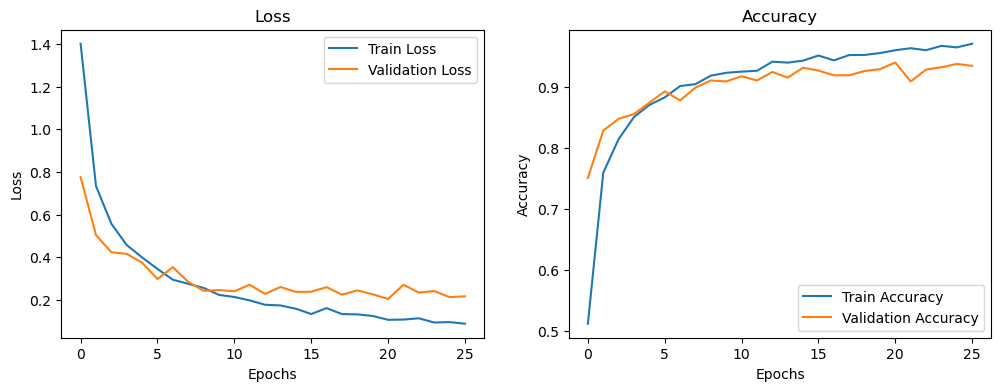

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
data_directory = './data/result_wav/'  # 멜 스펙트로그램 데이터 디렉토리 경로

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 64, 64  # 이미지 크기 설정 (64x64)
batch_size = 16  # 배치 크기 설정
epochs = 50  # 학습 에포크 수 설정
num_classes = 9  # 클래스 수 설정 (babycry, boil, carhorn 등 총 9개 클래스)

# CNN 모델 정의 함수
def create_cnn_model(input_shape, num_classes):
    """
    CNN 모델 생성 함수
    Args:
    - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
    - num_classes: 분류할 클래스 수
    Returns:
    - Sequential로 구성된 CNN 모델
    """
    model = Sequential([
        Input(shape=input_shape),  # 첫 번째 입력 레이어
        Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
        Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
        Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
        Flatten(),  # 평탄화 레이어
        Dense(128, activation='relu'),  # 완전 연결 레이어
        Dropout(0.5),  # 드롭아웃 레이어 (과적합 방지)
        Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])  # 모델 컴파일
    return model

# 데이터셋 준비
X_data = []  # 이미지 데이터 배열
y_data = []  # 레이블 배열

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
        class_number = int(filename.split('_')[0])
        # 이미지 파일 경로 설정
        img_path = os.path.join(data_directory, filename)
        # 이미지 불러오기 및 전처리
        img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
        img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
        X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
        y_data.append(class_number)  # 클래스 번호를 y_data 리스트에 추가

# 리스트를 numpy 배열로 변환
X_data = np.array(X_data)
y_data = np.array(y_data)

# 클래스 번호를 원-핫 인코딩
y_data = to_categorical(y_data, num_classes)

# 데이터셋을 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# CNN 모델 생성
model = create_cnn_model((img_height, img_width, 3), num_classes)

# 콜백 정의: 최적의 가중치를 저장하는 체크포인트 및 조기 종료
checkpoint_callback = ModelCheckpoint(
    'best_model.keras',  # 저장할 파일명 수정
    monitor='val_loss',  # 검증 손실 기준으로 최적 모델 판단
    save_best_only=True,  # 최적의 모델만 저장
    mode='min'  # 검증 손실이 가장 작을 때 갱신
)
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # 검증 손실 기준으로 조기 종료
    patience=5,  # 5번의 에포크 동안 개선되지 않으면 종료
    mode='min'  # 검증 손실이 가장 작을 때 종료
)

# 모델 학습
history = model.fit(
    X_train, y_train,  # 학습 데이터와 레이블
    epochs=epochs,  # 학습 에포크 수
    batch_size=batch_size,  # 배치 크기
    validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
    callbacks=[checkpoint_callback, early_stopping_callback]  # 콜백 추가
)

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)  # 테스트 데이터로 모델 평가
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # 평가 결과 출력

# 예측 및 성능 평가
Y_pred = model.predict(X_test)  # 테스트 데이터로 예측 수행
y_pred = np.argmax(Y_pred, axis=1)  # 예측된 클래스 라벨
y_true = np.argmax(y_test, axis=1)  # 실제 클래스 라벨

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))  # 혼동 행렬 출력

# 전체 모델 저장
model.save('final_model.keras')  # 전체 모델 저장

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")

# 학습 곡선 시각화
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 손실
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 학습 곡선 출력
plot_history(history)
